Q1 

In [1]:
def nth_prime(n):
    """
    This function will take in an integer n and return the nth prime number.
    
    :param n: the n-th index
    :type n: int
    :return: the n-th prime number
    :rtype: int
    """
    total_primes = 0
    size_factor = 2
    s = n* size_factor
    while total_primes < n:
        primes = get_primes(s)
        total_primes = sum(primes[2:])
        size_factor += 1
        s = n * size_factor
    return count_primes(primes, n)

def get_primes(s):
    """
    Generats primes using the Sieve of Eratosthenes
    Includes the optimization where for every prime p, only factors p >= p^2 are verified.
    
    :param s: approximate size of the list of primes
    :type s: int
    :return: The list of primes, which is represented with a bytearray. 
             Each index corresponds to an integer in the list. 
             A value of '1' at the index location indicates the integer is a prime.
    :rtype: bytearray    
    """
    primes = bytearray([1] * s)
    for i in range(2, s):
        for j in range(i, s):
            if i*j < s:
                primes[i * j] = 0
            else:
                break
    return primes

def count_primes(primes, n):
    """
    Returns the n-th prime represented by the index of the n-th '1' in the bytearray.
    
    :param primes: a list of prime numbers
    :type primes: list of int
    :param n: the n-th index
    :return the n-th prime
    :rtype: int
    """
    count = 0
    for k in range(2, len(primes)):
        count += primes[k]
        if count == n:
            return k

In [2]:
nth_prime(10001)

104743

Q2.

In [3]:
def route_count(grid_size):
    """
    This function will take the size of a square grid and return the number of routes from top left to down right.
    
    :param grid_size: the size of the square grid
    :type grid_size: int
    :return: how many routes can go through the grid from top left to down right.
    :rtype: int
    """
    L = [1] * grid_size
    
    for i in range(grid_size):
        for j in range(i):
            L[j] = L[j]+L[j-1]
        L[i] = 2 * L[i - 1]
    return L[grid_size - 1]

In [4]:
print("A route is starting in the top left corner and move to the down right corner. \n"
       + "There are {} such routes are there through a 20 x 20 grid.".format(route_count(20)))

A route is starting in the top left corner and move to the down right corner. 
There are 137846528820 such routes are there through a 20 x 20 grid.


Q3.

In [5]:
def pig_latin(s):
    """
    Return the converted pig latin of a given word. If the word starts with a consonant, 
    move the consonant to the end of the word and add 'ay'. If a word begins
    with a vowel, keep the vowel in place and add 'yay' to the end of the word.
    
    :param s: a word
    :type s: string
    :return: the pig latin of the word.
    :rtype: string
    """
    vowel = ['a', 'e', 'i', 'o', 'u']
    if s[0] not in vowel:
        return s[1:] + s[0] + 'ey'
    elif s[0] in vowel:
        return s[0:] + 'yey'

In [6]:
pig_latin('cats')

'atscey'

Q4.

In [7]:
import numpy as np
import pandas as pd

# Create a DataFrame with three columns and three rows and fill the DataFrame randomly between 1 and 25 inclusive.
df = pd.DataFrame(data=np.random.randint(1,26, size=(3,3)),columns=['a','b','c'])
# Get the mean of each column
df.mean()

a    12.333333
b    19.000000
c    12.000000
dtype: float64

Q5.

In [8]:
def subset_df(df, column, s, n):
    """
    Return a subset of the Data Frame based on the column name, the string option and the value.
    
    :param df: the original DataFrame 
    :type df: pandas DataFrame
    :param column: the column name
    :type column: string or int
    :param s: option string, option includes: 'gt', 'lt', 'ge', 'le'
    :type s: string
    :param n: value to compare with
    :type n: int
    :return: a subset of the DataFrame based on the conditions
    :rtype: pandas DataFrame

    """
    if s == 'gt':
        return df.loc[df[column] > n]
    elif s == 'lt':
        return df.loc[df[column] < n]
    elif s == 'ge':
        return df.loc[df[column] >= n]
    elif s == 'le':
        return df.loc[df[column] <= n]
    else:
        print("There is no {} option.".format(s))

In [9]:
subset_df(df,'a','gt',11)

,a,b,c
2,23,24,17


Q6.

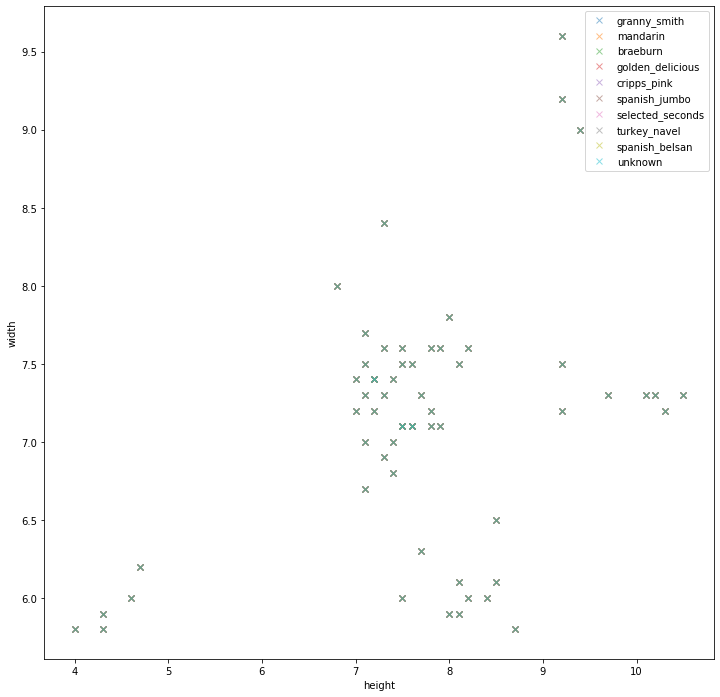

In [10]:
import matplotlib.pyplot as plt

# Load the data
fruit_df = pd.read_excel('data/Fruit Data.xlsx')

# Plot
fig, ax = plt.subplots(figsize=(12,12))
subtypes = fruit_df['fruit_subtype'].unique()
for s in subtypes:
    ax.plot(fruit_df['height'], fruit_df['width'], marker='x', linestyle='', label=s, alpha=0.5)
ax.set_xlabel("height")
ax.set_ylabel('width')
ax.legend()
plt.show()

Q7.

In SQL, order of operation is also know as the order of execution, for a sql query, the order of operation is as following:
* FROM, including JOINs
* WHERE
* GROUP BY
* HAVING
* WINDOW functions
* SELECT
* DISTINCT
* UNION
* ORDER BY
* LIMIT and OFFSET

Where the sql query may be written in the following order:
* SELECT DISTINCT <TOP_specification> <select_list>
* FROM <left_table>
* <join_type> JOIN <right_table>
* ON <join_condition>
* WHERE <where_condition>
* GROUP BY <group_by_list>
* HAVING <having_condition>
* ORDER BY <order_by_list>
* LIMIT



Q8.

In [11]:
query = """SELECT a.WORKER_ID, FIRST_NAME,LAST_NAME,SALARY,DEPARTMENT, TITLE 
            FROM WORKER A 
            LEFT JOIN TITLE B
            ON A.WORKER_ID = B.WORKER_REF_ID
            WHERE WORKER_TITLE NOT LIKE '%MANAGER%'
            ORDER BY SALARY DESC；"""